In [2]:
# iforestの精度を確認するプログラム
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
# データの読み込み
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [14]:
# dataframeに変換してデータの特徴を見る
df = pd.DataFrame(X, columns=data.feature_names)

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
df.describe()   

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [20]:
# モデルのトレーニング
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = IsolationForest(contamination=0.5, random_state=42)
model.fit(X_train)

IsolationForest(contamination=0.5, random_state=42)

In [38]:
# テストデータの予測
y_pred = model.predict(X_test)
y_pred = np.where(y_pred == -1, 0, 1) # -1(異常)を0(maligant)に, 1を1(benign)に変換

In [39]:
# 精度の確認
print(y_pred)
print(y_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

[1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1
 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0
 1 0 0]
[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]
0.6491228070175439


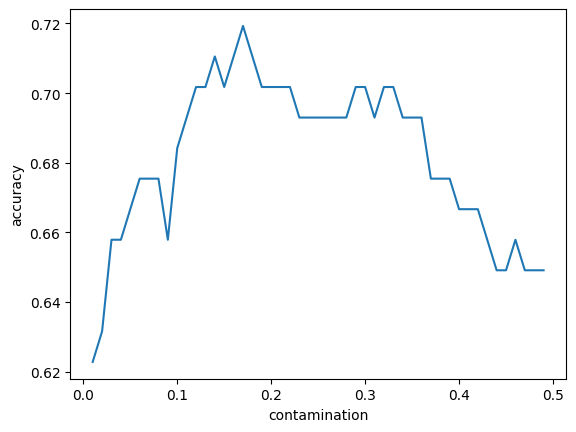

In [32]:
# contaminationの値を変えてみてプロット
import matplotlib.pyplot as plt
import numpy as np

contaminations = np.arange(0.01, 0.5, 0.01)
accuracies = []
for contamination in contaminations:
    model = IsolationForest(contamination=contamination, random_state=42)
    model.fit(X_train)
    y_pred = model.predict(X_test)
    y_pred = np.where(y_pred == -1, 0, 1) # 1をbenign、0をmaligantとする
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.plot(contaminations, accuracies)
plt.xlabel('contamination')
plt.ylabel('accuracy')
plt.show()


In [27]:
# 良性悪性を分割し、それぞれで学習させる
X_train_benign = X_train[y_train == 1]
X_train_malignant = X_train[y_train == 0]

model_benign = IsolationForest(contamination=0.1)
model_malignant = IsolationForest(contamination=0.1)
model_benign.fit(X_train_benign)
model_malignant.fit(X_train_malignant)

y_pred_benign = model_benign.predict(X_test)
y_pred_malignant = model_malignant.predict(X_test)

y_pred_benign = np.where(y_pred_benign == -1, 0, 1) # benignは1, malignantは0にする
y_pred_malignant = np.where(y_pred_malignant == -1, 1, 0)

accuracy_benign = accuracy_score(y_test, y_pred_benign)
accuracy_malignant = accuracy_score(y_test, y_pred_malignant)

print(accuracy_benign)
print(accuracy_malignant)

0.8771929824561403
0.7280701754385965


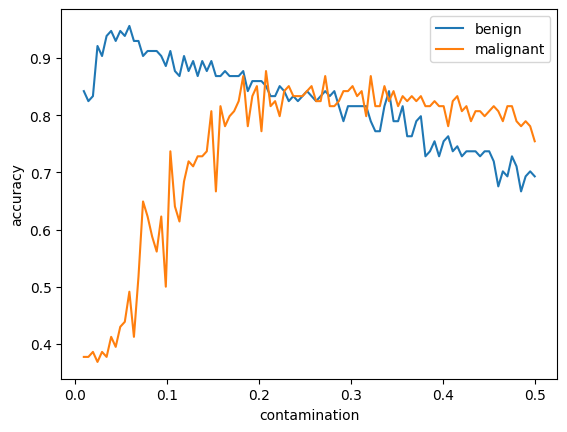

In [33]:
# iforestのcontaminationを変えてみて、結果をプロットする
import matplotlib.pyplot as plt

contaminations = np.linspace(0.01, 0.5, 100)
accuracies_benign = []
accuracies_malignant = []

for contamination in contaminations:
    model_benign = IsolationForest(contamination=contamination)
    model_malignant = IsolationForest(contamination=contamination)
    model_benign.fit(X_train_benign)
    model_malignant.fit(X_train_malignant)
    
    y_pred_benign = model_benign.predict(X_test)
    y_pred_malignant = model_malignant.predict(X_test)

    y_pred_benign = np.where(y_pred_benign == -1, 0, 1) # benignは1, malignantは0にする
    y_pred_malignant = np.where(y_pred_malignant == -1, 1, 0)

    accuracy_benign = accuracy_score(y_test, y_pred_benign)
    accuracy_malignant = accuracy_score(y_test, y_pred_malignant)

    accuracies_benign.append(accuracy_benign)
    accuracies_malignant.append(accuracy_malignant)


plt.plot(contaminations, accuracies_benign, label='benign')
plt.plot(contaminations, accuracies_malignant, label='malignant')
plt.xlabel('contamination')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [9]:
# LOFの場合
from sklearn.neighbors import LocalOutlierFactor
model = LocalOutlierFactor()

model.fit(X_train)
y_pred = model.fit_predict(X_test)
y_pred = np.where(y_pred == -1, 1, 0)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.37719298245614036


In [37]:
# 良性悪性を分割し、それぞれで学習させる
model_benign = LocalOutlierFactor()
model_malignant = LocalOutlierFactor()

model_benign.fit(X_train_benign)
model_malignant.fit(X_train_malignant)

y_pred_benign = model_benign.fit_predict(X_test)
y_pred_malignant = model_malignant.fit_predict(X_test)

y_pred_benign = np.where(y_pred_benign == -1, 0, 1) # benignは1, malignantは0にする
y_pred_malignant = np.where(y_pred_malignant == -1, 1, 0)

accuracy_benign = accuracy_score(y_test, y_pred_benign)
accuracy_malignant = accuracy_score(y_test, y_pred_malignant)

print(accuracy_benign)
print(accuracy_malignant)


0.6228070175438597
0.37719298245614036


In [11]:
# 他の機械学習モデルと比較
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {  
    "LogisticRegression": LogisticRegression(),
    "LinearSVC": LinearSVC(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "KNeighbors": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(name, accuracy)

LogisticRegression 0.956140350877193
LinearSVC 0.9035087719298246
DecisionTree 0.9473684210526315
RandomForest 0.956140350877193
KNeighbors 0.956140350877193


/Users/ham/Desktop/test_iforest/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ham/Desktop/test_iforest/venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/ham/Desktop/test_iforest/venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
